In [110]:
# Image Fruit Classification Using CNN 

In [95]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D


In [96]:
# Set the path to your dataset
train_data_dir = 'train'
test_data_dir = 'test'

In [97]:
# Parameters
batch_size = 32
image_size = (128, 128)
epochs = 50
num_classes = 10

In [98]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3
)

# Assuming your images are RGB and have dimensions (height, width, channels)
image_height, image_width = 224, 224  # Replace with your actual image dimensions

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [100]:
# Build Improved CNN Model
model = Sequential()

image_height, image_width, channels = 224, 224, 3  # Replace with your actual image dimensions

# Build Improved CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_height, image_width, channels)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes)) # output layer
model.add(Activation("softmax"))


In [101]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9  # Adjust the multiplier as needed
    return lr

In [103]:
# Use callbacks for early stopping, model checkpoint, and learning rate scheduler
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True),
    LearningRateScheduler(lr_scheduler)
]

In [104]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/50
72/72 [==============================] - 33s 452ms/step - loss: 2.2745 - accuracy: 0.2277 - val_loss: 2.5205 - val_accuracy: 0.2527 - lr: 0.0010
Epoch 2/50
72/72 [==============================] - 29s 396ms/step - loss: 1.7071 - accuracy: 0.3625 - val_loss: 1.7093 - val_accuracy: 0.4039 - lr: 0.0010
Epoch 3/50
72/72 [==============================] - 28s 393ms/step - loss: 1.5164 - accuracy: 0.4450 - val_loss: 1.9655 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 4/50
72/72 [==============================] - 29s 395ms/step - loss: 1.3801 - accuracy: 0.4972 - val_loss: 1.7033 - val_accuracy: 0.4624 - lr: 0.0010
Epoch 5/50
72/72 [==============================] - 28s 392ms/step - loss: 1.2834 - accuracy: 0.5376 - val_loss: 1.7152 - val_accuracy: 0.4498 - lr: 0.0010
Epoch 6/50
72/72 [==============================] - 28s 393ms/step - loss: 1.1997 - accuracy: 0.5815 - val_loss: 1.9792 - val_accuracy: 0.4371 - lr: 0.0010
Epoch 7/50
72/72 [==============================] - 28s 392ms/st

In [105]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

33/33 [==============================] - 3s 87ms/step - loss: 1.4896 - accuracy: 0.5502
Test accuracy: 0.5502439141273499


In [106]:
# Save the model
model.save('improved_fruit_classifier_model.h5')

In [107]:
# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show

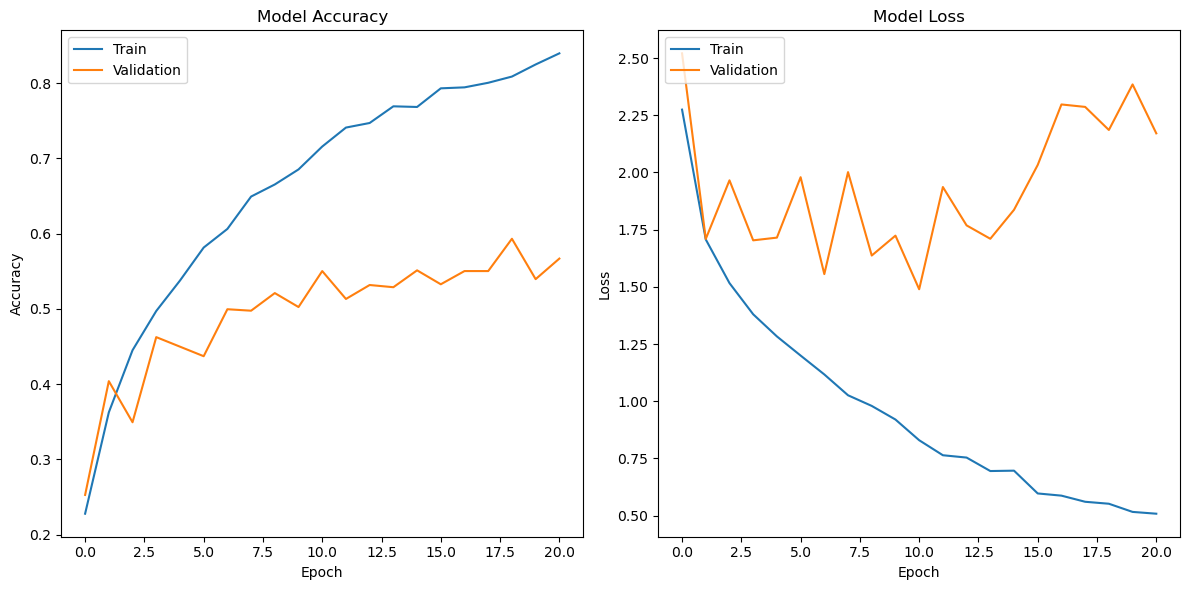

In [108]:
# Call the function to plot the history
plot_history(history)

In [109]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

# Set the path to your dataset
train_data_dir = 'train'
test_data_dir = 'test'

# Parameters
batch_size = 32
image_height, image_width = 224, 224  # Increase image size
num_classes = 10
epochs = 50

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming your images are RGB and have dimensions (height, width, channels)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Build Robust CNN Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))  # output layer

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9  # Adjust the multiplier as needed
    return lr

# Use callbacks for early stopping, model checkpoint, and learning rate scheduler
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True),
    LearningRateScheduler(lr_scheduler)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=callbacks
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('robust_fruit_classifier_model.h5')

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Epoch 1/50
72/72 [==============================] - 50s 682ms/step - loss: 28.2072 - accuracy: 0.2903 - val_loss: 36.9053 - val_accuracy: 0.1259 - lr: 0.0010
Epoch 2/50
72/72 [==============================] - 48s 664ms/step - loss: 5.5255 - accuracy: 0.2786 - val_loss: 40.2268 - val_accuracy: 0.1327 - lr: 0.0010
Epoch 3/50
72/72 [==============================] - 47s 646ms/step - loss: 2.2188 - accuracy: 0.2786 - val_loss: 18.4812 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 4/50
72/72 [==============================] - 48s 658ms/step - loss: 2.0792 - accuracy: 0.3020 - val_loss: 4.0971 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 5/50
72/72 [==============================] - 46s 640ms/step - loss: 1.9068 - accuracy: 0.3559 - val_loss: 9.1727 - val_accuracy: 0.2205 - lr: 0.0010
Epoch 6/50
72/72 [==============================] - 46s 641ms/step - loss: 1.8840 - accuracy: 0.3668 - val_loss: 5.4556 - val_accu

KeyboardInterrupt: 